In [0]:
# Creating two directories - "data" and "data/trainset_11classes_0_00000" 
!mkdir data && mkdir data/trainset_11classes_0_00000
# Downloading the ai-camp competition dataset
!wget -N https://ai-camp.s3-us-west-2.amazonaws.com/trainset_11classes_0_00000.zip
# Unzip the data into the folder "data/trainset_11classes_0_00000"
!unzip -qq -n trainset_11classes_0_00000.zip -d data/trainset_11classes_0_00000
# Switch directory to "data/trainset_11classes_0_00000" and show its content
!cd data/trainset_11classes_0_00000 && ls

--2019-09-29 19:54:12--  https://ai-camp.s3-us-west-2.amazonaws.com/trainset_11classes_0_00000.zip
Resolving ai-camp.s3-us-west-2.amazonaws.com (ai-camp.s3-us-west-2.amazonaws.com)... 52.218.232.201
Connecting to ai-camp.s3-us-west-2.amazonaws.com (ai-camp.s3-us-west-2.amazonaws.com)|52.218.232.201|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-09-29 19:54:12 ERROR 404: Not Found.

unzip:  cannot find or open trainset_11classes_0_00000.zip, trainset_11classes_0_00000.zip.zip or trainset_11classes_0_00000.zip.ZIP.


In [0]:
import os

base_dir = 'data/trainset_11classes_0_00000'

# Directory to our training data
train_folder = os.path.join(base_dir, 'train')

# Directory to our validation data
val_folder = os.path.join(base_dir, 'val')

In [0]:
# List folders and number of files
print("Directory, Number of files")
for root, subdirs, files in os.walk(base_dir):
    print(root, len(files))
    

Directory, Number of files
data/trainset_11classes_0_00000 0
data/trainset_11classes_0_00000/train 0
data/trainset_11classes_0_00000/train/HulkSmash 88
data/trainset_11classes_0_00000/train/HandGun 93
data/trainset_11classes_0_00000/train/KoreanHeart 87
data/trainset_11classes_0_00000/train/ChairPose 89
data/trainset_11classes_0_00000/train/WarriorPose 93
data/trainset_11classes_0_00000/train/Salute 90
data/trainset_11classes_0_00000/train/HandShake 83
data/trainset_11classes_0_00000/train/ChildPose 81
data/trainset_11classes_0_00000/train/Dabbing 89
data/trainset_11classes_0_00000/train/KungfuSalute 92
data/trainset_11classes_0_00000/train/KungfuCrane 88
data/trainset_11classes_0_00000/val 0
data/trainset_11classes_0_00000/val/HulkSmash 24
data/trainset_11classes_0_00000/val/HandGun 26
data/trainset_11classes_0_00000/val/KoreanHeart 22
data/trainset_11classes_0_00000/val/ChairPose 23
data/trainset_11classes_0_00000/val/WarriorPose 22
data/trainset_11classes_0_00000/val/Salute 24
data/

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

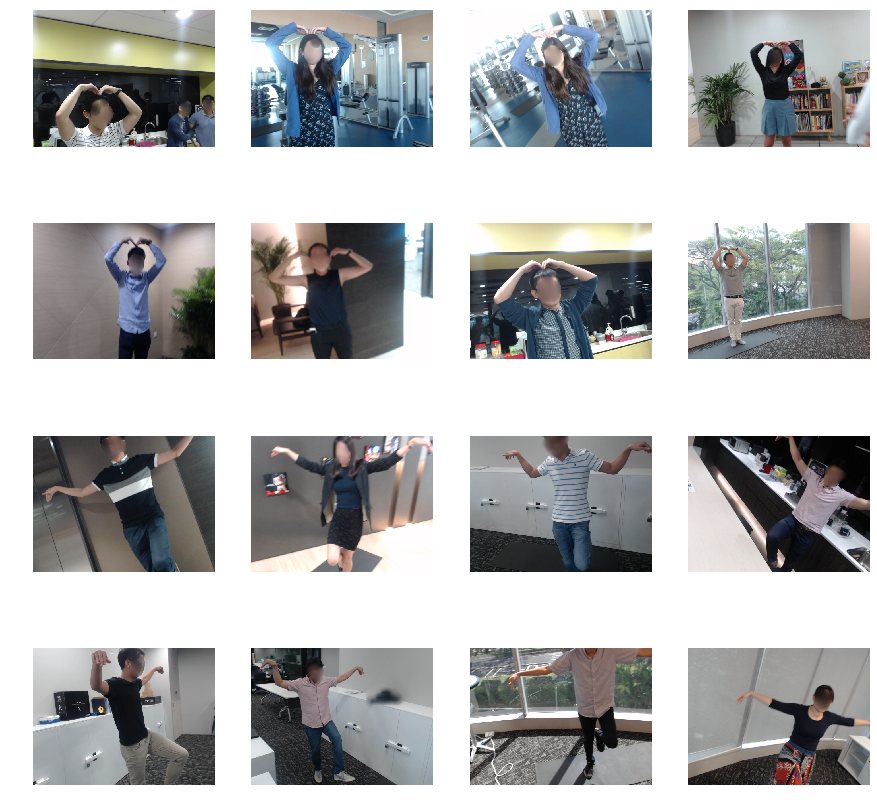

In [0]:
## Path to KoreanHeart and KungfuCrane
train_koreanheart_dir= "data/trainset_11classes_0_00000/train/KoreanHeart"
train_kungfucrane_dir= "data/trainset_11classes_0_00000/train/KungfuCrane"
train_koreanheart_fnames = os.listdir(train_koreanheart_dir)
train_kungfucrane_fnames = os.listdir(train_kungfucrane_dir)

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(15, 15)

pic_index += 8
next_koreanheart_pix = [os.path.join(train_koreanheart_dir, fname) 
                for fname in train_koreanheart_fnames[pic_index-8:pic_index]]
next_kungfucrane_pix = [os.path.join(train_kungfucrane_dir, fname) 
                for fname in train_kungfucrane_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_koreanheart_pix+next_kungfucrane_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-06-09 03:30:27--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 2607:f8b0:400c:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   161MB/s    in 0.5s    

2019-06-09 03:30:28 (161 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

#local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights='imagenet')
#pre_trained_model.load_weights(local_weights_file)

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step


In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [0]:
last_layer = pre_trained_model.get_layer('mixed7')
print ('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model

num_classes = 11

#x = layers.GlobalAveragePooling2D()(last_output)
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.6)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Add our data-augmentation parameters to ImageDataGenerator

bs = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_folder, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=bs,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_folder,
        target_size=(150, 150),
        batch_size=bs,
        class_mode='categorical')

Found 973 images belonging to 11 classes.
Found 253 images belonging to 11 classes.


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

bestValidationCheckpointer = ModelCheckpoint('train_model.hdf5', monitor='val_acc', save_best_only=True, verbose=1)

In [0]:

history = model.fit_generator(
        train_generator, # train generator has 973 train images
        steps_per_epoch=train_generator.samples // bs + 1,
        epochs=20,
        validation_data=validation_generator, # validation generator has 253 validation images
        validation_steps=validation_generator.samples // bs + 1,
        callbacks=[bestValidationCheckpointer]
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8/8 [==============================] - 4s 511ms/step - loss: 2.1145 - acc: 0.2846

Epoch 00001: val_acc improved from -inf to 0.28458, saving model to train_model.hdf5
31/31 [==============================] - 30s 964ms/step - loss: 2.5135 - acc: 0.1531 - val_loss: 2.1145 - val_acc: 0.2846
Epoch 2/20
8/8 [==============================] - 3s 400ms/step - loss: 1.9517 - acc: 0.3399

Epoch 00002: val_acc improved from 0.28458 to 0.33992, saving model to train_model.hdf5
31/31 [==============================] - 14s 439ms/step - loss: 2.2500 - acc: 0.2189 - val_loss: 1.9517 - val_acc: 0.3399
Epoch 3/20
8/8 [==============================] - 3s 398ms/step - loss: 1.9730 - acc: 0.3399

Epoch 00003: val_acc did not improve from 0.33992
31/31 [==============================] - 14s 459ms/step - loss: 2.0768 - acc: 0.3042 - val_loss: 1.9730 - val_acc: 0.3399
Epoch 4/20
8/8 [==============================] - 3s 394ms/step - loss: 1.9614 - 

In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
        train_generator, # train generator has 973 train images
        steps_per_epoch=train_generator.samples // bs + 1,
        epochs=60,
        validation_data=validation_generator, # validation generator has 253 validation images
        validation_steps=validation_generator.samples // bs + 1,
        callbacks=[bestValidationCheckpointer]
)

Epoch 1/60
8/8 [==============================] - 4s 450ms/step - loss: 2.2769 - acc: 0.4229

Epoch 00001: val_acc did not improve from 0.42292
31/31 [==============================] - 15s 489ms/step - loss: 1.1537 - acc: 0.6115 - val_loss: 2.2769 - val_acc: 0.4229
Epoch 2/60
8/8 [==============================] - 3s 400ms/step - loss: 2.3370 - acc: 0.4190

Epoch 00002: val_acc did not improve from 0.42292
31/31 [==============================] - 14s 450ms/step - loss: 1.1645 - acc: 0.6095 - val_loss: 2.3370 - val_acc: 0.4190
Epoch 3/60
8/8 [==============================] - 3s 387ms/step - loss: 2.3930 - acc: 0.4150

Epoch 00003: val_acc did not improve from 0.42292
31/31 [==============================] - 14s 456ms/step - loss: 1.2300 - acc: 0.6002 - val_loss: 2.3930 - val_acc: 0.4150
Epoch 4/60
8/8 [==============================] - 3s 389ms/step - loss: 2.4396 - acc: 0.4150

Epoch 00004: val_acc did not improve from 0.42292
31/31 [==============================] - 14s 446ms/step - 

In [0]:
from tensorflow.keras.models import load_model

model_path = 'train_model.hdf5'
model = load_model( model_path )

In [1]:
validation_generator.reset()

scores = model.evaluate_generator(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1, verbose=1)
print('Val loss:', scores[0])
print('Val accuracy:', scores[1])

NameError: ignored